# EEN060 - Applied object-oriented programming

Teacher: [Carlos Natalino](https://www.chalmers.se/en/staff/Pages/Carlos-Natalino-Da-Silva.aspx) / Examiner: [Paolo Monti](https://www.chalmers.se/en/staff/Pages/Paolo-Monti.aspx)

[Canvas course page](https://chalmers.instructure.com/courses/28094)

[Course channel on Chalmers Play](https://play.chalmers.se/channel/EEN060_EEN065_Applied_object-oriented_programming/300149)

Before you turn this assignment list in, make sure everything runs as expected.
First, **restart the kernel** and then **run all cells**.
Then, check if all the tests run correctly.
Note that if one of the problems present an error, the following ones **will not** be tested.

In case of discrepancies between the problem command and the tests, you should solve it having in mind the tests.

There are two types of cell:
1. *solution cells:* These are the cells where you write your answer, or modify the existing code to solve the problem.
2. *test cells:* These cells are used to test whether your solution is correct or not. If the tests run correctly, you should see a message `tests passed`. Otherwise, you should see an error message.

**Delete** the line `raise NotImplementedError()` from the problems that you solve.

**Do not delete or add any cell in this file.** All cells that you need are already in place.

You may also have problems that will be manually graded (e.g., HTML/CSS/JS/pseudocode problems).
These problems **do not** have a respective *test cell*.

If you want to execute a cell, select the cell and press **CTRL+Enter** (in Windows) or **CMD+Enter** (in macOS) or click on the **Run cell** button.

**If you want, you can solve this programming assignment using Google Colab**

Link: https://colab.research.google.com/

Just copy the following line to a code line and run it.

In [1]:
# !pip install --upgrade --user pip pip-tools
# !pip install ipykernel jupyter notebook wtforms flask flask-wtf gunicorn nose flask-testing pytest coverage flake8 requests mypy pylint blinker types-requests isort black lorem-text bs4 pep8-naming matplotlib redis types-redis

## Assignment week 7

In this assignment, students should practice:
- how to use Matplotlib to create plots
- how to use Jinja to create web pages

The problems here are related to chapters 10, 11, 12, and 13 of the lecture notes, and includes knowledge from previous chapters.

**Preparation:** Run the cell below every time you start working on this file, and every time you restart the kernel.

In [2]:
%load_ext autoreload
try:
    from utils import validate_python_code, validate_html
except:
    import sys
    print("It seems this file is in the wrong folder. "
          "Make sure to place it in the `programming-assignments` folder/project.",
          file=sys.stderr)

### Level 1

Level 1 problems are simple problems that required only the knowledge obtained in the content of the lecture and the lecture notes of the particular lecture.

#### Problem 1.1

Create a function called `get_composite_numbers` that receives an integer as parameter.
The integer parameter defines how many composite numbers should be returned by the function starting from 4 (assuming that 1 is prime).
The list of composite number must be returned in the JSON format.

The function must be decorated such that it is available as a GET route in Flask, and accessible through the URL `/composite/<quantity>`.

If the received parameter is not an integer, the function must return an empty list in JSON format.

If the received parameter can be converted to an integer such as `11`, then convert the string to integer and output the list of composite numbers in JSON format.

**Note:** 
You must not delete the parts outside the begin and end solution marks. Inside your solution, only the function must be present, i.e., you must not use `app.run()`. The function must return the `Response` type defined at the beginning of the solution cell.

```
# write here your pseudocode (not graded)

# * pseudocode is necessary when asking for help during the lab
```

In [3]:
%%writefile flask_app.py
# solution cell

from flask import Flask, jsonify
from flask.wrappers import Response as FlaskResponse
from werkzeug.wrappers.response import Response as WerkzeugResponse

# creates a Response type to be used as the return type of the function
Response = str | FlaskResponse | WerkzeugResponse

app = Flask(__name__)


### BEGIN SOLUTION
@app.route("/composite/<quantity>", methods=["GET"])
def get_composite_numbers(quantity: str) -> Response:
    try:
        q: int = int(quantity)
        comp_num: list[int] = []
        num = 4
        while len(comp_num) < q:
            if any(num % i == 0 for i in range(2, int(num ** 0.5) + 1)):
                comp_num.append(num)
            num += 1
        return jsonify(comp_num)
    except ValueError:
        return jsonify([])


### END SOLUTION


Overwriting flask_app.py


In [4]:
%autoreload 2
# uncomment the line(s) below to debug
from flask_app import app
import json

quantity = "11"
with app.test_client() as client:
    response = client.get('/composite/'+str(quantity))
    res = json.loads(response.data.decode('utf-8'))
print(f"The first {quantity} composite numbers are: {res}")
print('Execution finished', u'\u2713')

The first 11 composite numbers are: [4, 6, 8, 9, 10, 12, 14, 15, 16, 18, 20]
Execution finished ✓


In [5]:
%autoreload 2
# test cell
try:
    import flask_app
except:
    raise ValueError("You did not execute your solution cell!")
try:
    from flask_app import app
except:
    raise ValueError("Your solution does not contain the right function!")

import random
from flask_app import app
import json

with app.test_client() as client:
    response = client.get('/composite/abc')
    res = json.loads(response.data.decode('utf-8'))

    assert len(res) == 0, f"\For the input `abc` the function returned `{res}`.\
     When the parameter is not an integer or it cannot be converted\
     to an integer, the function must return a list with zero elements in JSON."

    for _ in range(3):
        quantity = random.randint(10, 50)
        response = client.get(f'/composite/{quantity}')
        res = json.loads(response.data.decode('utf-8'))
        assert len(res) == quantity, f"The response should have {quantity} numbers but it has {len(response)}."

validate_python_code("flask_app.py")
print('tests passed', u'\u2713')

tests passed ✓


---
## Level 2

Problems in level 2 should build upon the content of the lecture and the content of previous lectures.
Therefore, the problems can be solved based solely on the lecture notes available for the course up to the lecture the assignment is about.

### Problem 2.1

Create a Python function named `plot_data` that takes a list of `floats` as input and generates a line plot using matplotlib. 

**Rules:**
1. The input list is taken as y-axis of the plot and a list starting from 5 to `len(input list) + 5` is taken as x-axis.
2. Use `"b"` as the format for the plot and `linewidth=2`.
3. Set the xlabel as "n" and ylabel as "# Misclustered Nodes".
4. The x-axis in the plot should start at 5 and y-axis at 0. You must use `set_xlim` and `set_ylim`, respectively.
5. Set the title of the plot to be "# Misclustered Nodes / # nodes".
6. Finally save the plot into a file named "plot.png" and return the figure object.

**Example:**
Input data: [6.2, 8.6, 12.5, 14.9, 18.7, 17.5, 24.2, 23.2, 26.5, 25.2, 25.7, 25.7, 21.9, 24.0, 17.7, 20.6, 17.6, 10.8, 10.4, 7.6, 10.3, 5.3, 5.6, 5.2]

plot.png:

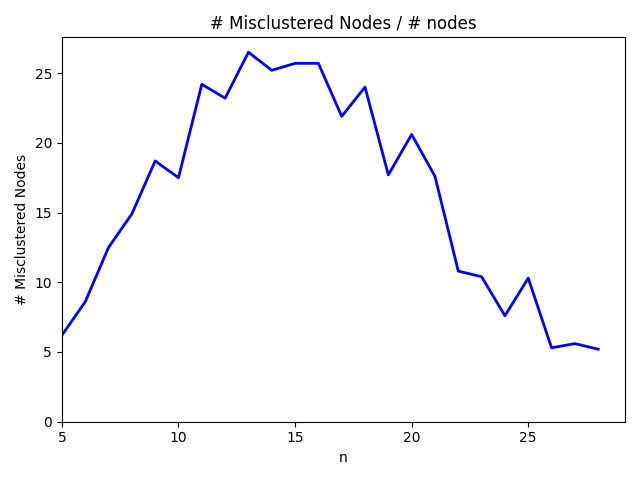


In [6]:
%%writefile plot_data_solution.py
# solution cell
### BEGIN SOLUTION
from matplotlib.figure import Figure


def plot_data(inpl: list[float]) -> Figure:
    fig = Figure()
    axes = fig.gca()
    x_axis: list[int] = []
    for i in range(5, len(inpl) + 5):
        x_axis.append(i)
    axes.plot(x_axis, inpl, color="b", linewidth="2")
    axes.set_ylabel("# Misclustered Nodes")
    axes.set_xlabel("n")
    axes.set_title("# Misclustered Nodes / # nodes")
    axes.set_xlim(5)
    axes.set_ylim(0)
    fig.savefig("plot.png")
    return fig


### END SOLUTION


Overwriting plot_data_solution.py


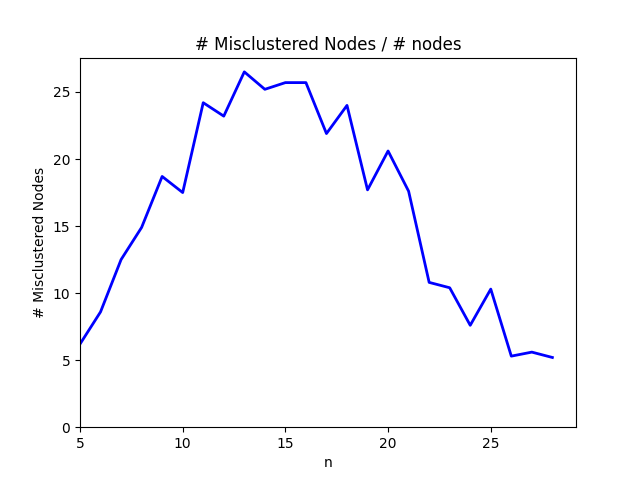

Execution finished ✓


In [7]:
%autoreload 2
%matplotlib inline
# uncomment the line(s) below to debug
from plot_data_solution import plot_data
from IPython.display import Image, display

data = [6.2, 8.6, 12.5, 14.9, 18.7, 17.5, 24.2, 23.2, 26.5, 25.2, 25.7, 25.7, 21.9, \
    24.0, 17.7, 20.6, 17.6, 10.8, 10.4, 7.6, 10.3, 5.3, 5.6, 5.2]
fig = plot_data(data)
display(Image("plot.png"))
print('Execution finished', u'\u2713')

In [8]:
%autoreload 2
# test cell
try:
    import plot_data_solution
except:
    raise ValueError("You did not execute your solution cell!")
try:
    from plot_data_solution import plot_data
except:
    raise ValueError("Your solution does not contain the right function!")

import os

if os.path.exists("plot.png"):
    os.remove("plot.png")

data = [6.2, 18.7, 17.5, 24.2, 23.2, 5.6, 5.2]
fig = plot_data(data)
axes = fig.gca()
assert axes.get_title() == "# Misclustered Nodes / # nodes", "The title is incorrect."
assert axes.get_xlabel() == "n", "X-label is incorrect."
assert axes.get_ylabel() == "# Misclustered Nodes", "Y-label is incorrect."
assert axes.get_xlim()[0] == 5, "X-limit is incorrect."
assert axes.get_ylim()[0] == 0, "Y-limit is incorrect."
assert os.path.exists("plot.png") == True, "Plot is not saved as plot.png"

validate_python_code("plot_data_solution.py")
print('tests passed', u'\u2713')

tests passed ✓


---
## Level 3: Pseudocode/HTML/CSS/JS problems

In these problems we are training the design part of the course, which will in the final project.

Recommended sources:
- HTML: https://www.w3schools.com/html/
- CSS: https://www.w3schools.com/css/
- JavaScript: https://www.w3schools.com/js/
- Jinja2: https://jinja.palletsprojects.com/en/3.0.x/

### Problem 3.1

In the cell below, create a Jinja template (written in the Jinja templating language) that receives a Python list under the variable name `values`.
The template should create a table that shows the content of `values` in a table with two columns: index in the list and value at that index.
Index and value should be explicitly defined as the heads of the table.

**Important:** The solution cell must *not* have any Python code. Only HTML/Jinja2 code is allowed.

The following example shows how the output of the test cell should look like.

Code for testing:
```
values = ['test value 1', 
        'test value 2', 
        'test value 3', 
        'test value 4', 
        'test value 5', 
        'test value 6']
```

Must result in the following output (the border is used just to delimit the output):

<div style="border: 1px solid red;">
<table>
    <thead>
        <tr>
            <th>Index</th>
            <th>Value</th>
        </tr>
    </thead>
    <tbody>
        <tr><td>1</td><td>test value 1</td></tr>
        <tr><td>2</td><td>test value 2</td></tr>
        <tr><td>3</td><td>test value 3</td></tr>
        <tr><td>4</td><td>test value 4</td></tr>
        <tr><td>5</td><td>test value 5</td></tr>
        <tr><td>6</td><td>test value 6</td></tr>
    </tbody>
</table>
</div>

**Note:** 
Each tag should be in one line, i.e., there should be a line break between every two tags. The border is used just to delimit the output.

In [9]:
%%writefile table_template.html
<!--  BEGIN SOLUTION  -->
<table>
    <thead>
        <tr>
            <th>Index</th>
            <th>Value</th>
        </tr>
    </thead>
    <tbody>
        {% for v in values %}
            <tr>
                <td>{{ loop.index }}</td>
                <td>{{ v }}</td>
            </tr>
        {% endfor %}
    </tbody>
</table>
<!-- END SOLUTION  -->


Overwriting table_template.html


In [10]:
from jinja2 import Environment, FileSystemLoader

values = ['test value 1', 
    'test value 2', 
    'test value 3', 
    'test value 4', 
    'test value 5', 
    'test value 6']

env = Environment(loader=FileSystemLoader(searchpath="./"))
template = env.get_template("table_template.html")
print(template.render(values=values))

<!--  BEGIN SOLUTION  -->
<table>
    <thead>
        <tr>
            <th>Index</th>
            <th>Value</th>
        </tr>
    </thead>
    <tbody>
        
            <tr>
                <td>1</td>
                <td>test value 1</td>
            </tr>
        
            <tr>
                <td>2</td>
                <td>test value 2</td>
            </tr>
        
            <tr>
                <td>3</td>
                <td>test value 3</td>
            </tr>
        
            <tr>
                <td>4</td>
                <td>test value 4</td>
            </tr>
        
            <tr>
                <td>5</td>
                <td>test value 5</td>
            </tr>
        
            <tr>
                <td>6</td>
                <td>test value 6</td>
            </tr>
        
    </tbody>
</table>
<!-- END SOLUTION  -->


In [11]:
%autoreload 2
# DO NOT REMOVE THIS CODE >>> BEGINNING
# this cell assembles the HTML returned by the function that you wrote
# and renders it in the "preview" window
from jinja2 import Environment, FileSystemLoader

from IPython.display import display, HTML
html_header = """<!DOCTYPE html>
    <html lang="en">
        <head>
            <title>Page Title</title>
        </head>
        <body>
            <p style="color: red;">start of your solution &gt;&gt;&gt;&gt;</p>
            <hr/>
        """
html_header_offset = 1  # number of lines in the header
html_footer = """        <hr/>
        <p style="color: red;">&lt;&lt;&lt;&lt; end of your solution</p>
    </body>
</html>"""

env = Environment(loader=FileSystemLoader(searchpath="./"))
template = env.get_template("table_template.html")

values = ['test value 1', 
    'test value 2', 
    'test value 3', 
    'test value 4', 
    'test value 5', 
    'test value 6']

html_to_test = html_header + template.render(values=values) + html_footer
display(HTML(html_to_test))

# DO NOT REMOVE THIS CODE <<< END

Index,Value
1,test value 1
2,test value 2
3,test value 3
4,test value 4
5,test value 5
6,test value 6


In [12]:
%autoreload 2
# test cell
import os
from jinja2 import Environment, FileSystemLoader

if not os.path.exists("table_template.html"):
    raise ValueError("You did not execute your solution cell!") 

has_error = False
allowed_same_line = ['b', 'strong', 'i', 'pre']

html_header = """<!DOCTYPE html>
    <html lang="en">
        <head>
            <title>Page Title</title>
        </head>
        <body>
        """

html_footer = """
    </body>
</html>"""

values = ['test value 1', 
    'test value 2', 
    'test value 3', 
    'test value 4', 
    'test value 5', 
    'test value 6']

env = Environment(loader=FileSystemLoader(searchpath="./"))
template = env.get_template("table_template.html")

html_to_test = html_header + template.render(values=values) + html_footer

soup = validate_html(html_to_test)

tag_set = set([str(tag.name) for tag in soup.find_all()])
tag_pairs = []
for tag_1 in tag_set:
    for tag_2 in tag_set:
        if tag_1 != tag_2 and tag_1 not in allowed_same_line and tag_2 not in allowed_same_line:
            tag_pairs.append((tag_1, tag_2))

for i, line in enumerate(html_to_test.split('\n')):
    for tag_1, tag_2 in tag_pairs:
        if f'<{tag_1}>' in line or f'</{tag_1}>' in line:
            assert f'<{tag_2}>' not in line and f'</{tag_2}>' not in line, \
                f'Line {i+1} has two tags in the same line \
                    ({tag_1} and {tag_2}).\n\
                        You must have them in different lines.\nLine {i+1}:\t{line}'

td = soup.find_all('td')
th = soup.find_all('th')
assert len(td) == 12, f'You should have 12 table cells. You have {len(td)} instead.'
assert len(th) == 2, f'You should have 2 column headers. You have {len(th)} instead.'

print('tests passed', u'\u2713')

first
tests passed ✓
